### Лист 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# 1.1. Генерация исходных данных
np.random.seed(1818)
a = np.random.uniform(2, 5, (3, 2)) #np.array([[3.5, 1], [1, 2], [1, 3]]) #  # матрица aij
a0 = np.random.uniform(200, 700, (3,)) #np.array([350, 240, 150]) #  # вектор ai0
c1 = np.random.uniform(50, 250, (2,)) #np.array([200, 100]) #  # вектор c1j
c2 = np.random.uniform(200, 1400, (2,)) #np.array([1200, 300]) #  # вектор c2j
c3 = np.random.uniform(70, 300, (2,)) #np.array([100, 200]) #  # вектор c3j
c_sum = c1 + c2 - c3
#c_sum_w = 0.1 * c1 + 0.2 * c2 - 0.7 * c3
c_sum_w = np.random.uniform(0, 1) * c1 + np.random.uniform(0, 1) * c2 - np.random.uniform(0, 1) * c3

print(a)
print(c1)
print(c2)
print(c3)
print(c_sum)
print(c_sum_w)

[[2.12774629 4.41662441]
 [4.24103551 2.15616439]
 [2.87365765 3.76120369]]
[ 98.06917393 139.85747768]
[744.79109827 230.34123708]
[265.47258762 184.14688251]
[577.38768457 186.05183226]
[14.58330535  6.34508472]


In [2]:
res_profit = linprog(-c1, A_ub=a, b_ub=a0, bounds=[(0, None), (0, None)])
res_revenue = linprog(-c2, A_ub=a, b_ub=a0, bounds=[(0, None), (0, None)])
res_cost = linprog(c3, A_ub=a, b_ub=a0, bounds=[(0, None), (0, None)])
res_sum = linprog(-c_sum, A_ub=a, b_ub=a0, bounds=[(0, None), (0, None)])
res_sum_w = linprog(-c_sum_w, A_ub=a, b_ub=a0, bounds=[(0, None), (0, None)])

print('ЦФ1:')
print('x1\tx2\tLопт')
print(f"{res_profit.x[0]:.2f}\t{res_profit.x[1]:.2f}\t{c1[0]*res_profit.x[0]+c1[1]*res_profit.x[1]:.2f}")

print('\nЦФ2:')
print('x1\tx2\tLопт')
print(f"{res_revenue.x[0]:.2f}\t{res_revenue.x[1]:.2f}\t{c2[0]*res_revenue.x[0]+c2[1]*res_revenue.x[1]:.2f}")

print('\nЦФ3:')
print('x1\tx2\tLопт')
print(f"{res_cost.x[0]:.2f}\t{res_cost.x[1]:.2f}\t{c3[0]*res_cost.x[0]+c3[1]*res_cost.x[1]:.2f}")

print('\nЦФ1+ЦФ2+ЦФ3 (равнозначные ЦФ):')
print('x1\tx2\tLопт')
print(f"{res_sum.x[0]:.2f}\t{res_sum.x[1]:.2f}\t{c_sum[0]*res_sum.x[0]+c_sum[1]*res_sum.x[1]:.2f}")

print('\nЦФ1+ЦФ2+ЦФ3 (неравнозначные ЦФ):')
print('x1\tx2\tLопт')
print(f"{res_sum_w.x[0]:.2f}\t{res_sum_w.x[1]:.2f}\t{c_sum_w[0]*res_sum_w.x[0]+c_sum_w[1]*res_sum_w.x[1]:.2f}")

ЦФ1:
x1	x2	Lопт
27.51	93.14	15723.37

ЦФ2:
x1	x2	Lопт
120.22	0.00	89536.50

ЦФ3:
x1	x2	Lопт
0.00	0.00	0.00

ЦФ1+ЦФ2+ЦФ3 (равнозначные ЦФ):
x1	x2	Lопт
120.22	0.00	69411.78

ЦФ1+ЦФ2+ЦФ3 (неравнозначные ЦФ):
x1	x2	Lопт
120.22	0.00	1753.16


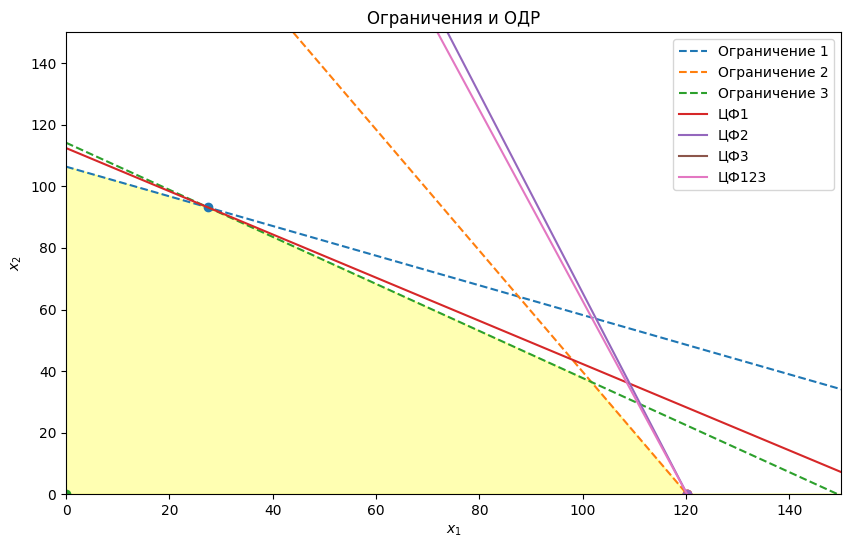

In [3]:
def plot_constraints(a, a0):
    x = np.linspace(0, 220, 400)
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.plot(x, (a0[i] - a[i, 0] * x) / a[i, 1], linestyle='dashed', label=f'Ограничение {i+1}')
    plt.xlim(0, 150)
    plt.ylim(0, 150)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Ограничения и ОДР')
    
    plt.plot([0, (c1[0]*res_profit.x[0]+c1[1]*res_profit.x[1]) / c1[0]], [(c1[0]*res_profit.x[0]+c1[1]*res_profit.x[1]) / c1[1], 0], label=f'ЦФ1')
    plt.plot([0, (c2[0]*res_revenue.x[0]+c2[1]*res_revenue.x[1]) / c2[0]], [(c2[0]*res_revenue.x[0]+c2[1]*res_revenue.x[1]) / c2[1], 0], label=f'ЦФ2')
    plt.plot([0, (c3[0]*res_cost.x[0]+c3[1]*res_cost.x[1]) / c2[0]], [(c3[0]*res_cost.x[0]+c3[1]*res_cost.x[1]) / c3[1], 0], label=f'ЦФ3')
    plt.plot([0, (c_sum[0]*res_sum.x[0]+c_sum[1]*res_sum.x[1]) / c_sum[0]], [(c_sum[0]*res_sum.x[0]+c_sum[1]*res_sum.x[1]) / c_sum[1], 0], label=f'ЦФ123')

    # Выделение области допустимых решений (ОДР) желтым цветом
    y1 = np.maximum(0, (a0[0] - a[0, 0] * x) / a[0, 1])
    y2 = np.maximum(0, (a0[1] - a[1, 0] * x) / a[1, 1])
    y3 = np.maximum(0, (a0[2] - a[2, 0] * x) / a[2, 1])

    plt.fill_between(x, np.minimum(np.minimum(y1, y2), y3), color='yellow', alpha=0.3)
    plt.legend()
    
plot_constraints(a, a0)

plt.scatter(res_profit.x[0], res_profit.x[1])
plt.scatter(res_revenue.x[0], res_revenue.x[1])
plt.scatter(res_cost.x[0], res_cost.x[1])
plt.scatter(res_sum.x[0], res_sum.x[1])
plt.scatter(res_sum_w.x[0], res_sum_w.x[1])

#plot_objective_lines(c1, 'Приб. марж. (ЦФ1)', 'blue')
#plot_objective_lines(c2, 'Выручка (ЦФ2)', 'green')
#plot_objective_lines(c3, 'Себест. (ЦФ3)', 'red')

### Лист 2

In [4]:
res_profit_2 = linprog(-c1, A_ub=a, b_ub=a0, bounds=[(0, None), (0, None)])
print('ЦФ2:')
print('x1\tx2\tLопт')
print(f"{res_profit_2.x[0]:.2f}\t{res_profit_2.x[1]:.2f}\t{c2[0]*res_profit_2.x[0]+c2[1]*res_profit_2.x[1]:.2f}")

# Уступка 5% от оптимального значения c2
c2_concession = 0.95 * (c2[0]*res_profit_2.x[0] + c2[1]*res_profit_2.x[1])
a_extended = np.vstack([a, -c2])
b_extended = np.append(a0, -c2_concession)

# Решение для c1 с учетом уступки от c2
res_profit_concession = linprog(-c1, A_ub=a_extended, b_ub=b_extended, bounds=[(0, (c2[0]*res_revenue.x[0]+c2[1]*res_revenue.x[1])/c2[0]), (0, (c2[0]*res_revenue.x[0]+c2[1]*res_revenue.x[1])/c2[1])])

# Уступка 5% от оптимального значения c1
c1_concession = 0.95 * (c1[0]*res_profit_concession.x[0] + c1[1]*res_profit_concession.x[1])
a_extended_2 = np.vstack([a_extended, -c1])
b_extended_2 = np.append(b_extended, -c1_concession)

# Решение для c3 с учетом уступок от c1 и c2
res_cost_concession = linprog(c3, A_ub=a_extended_2, b_ub=b_extended_2, bounds=[(0, None), (0, None)])

# Вывод результатов
print("\nЦФ1 (уступка 5% от ЦФ2)")
print('x1\tx2\tLопт')
print(f"{res_profit_concession.x[0]:.2f}\t{res_profit_concession.x[1]:.2f}\t{c1[0]*res_profit_2.x[0]+c1[1]*res_profit_2.x[1]:.2f}")
#print("x1:", res_profit_concession.x[0], "x2:", res_profit_concession.x[1], {c1[0]*res_profit_2.x[0]+c1[1]*res_profit_2.x[1]:.2f})

print("\nЦФ3 (уступка 5% от ЦФ1)")
print('x1\tx2\tLопт')
print(f"{res_cost_concession.x[0]:.2f}\t{res_cost_concession.x[1]:.2f}\t{c3[0]*res_cost_concession.x[0]+c3[1]*res_cost_concession.x[1]:.2f}")

ЦФ2:
x1	x2	Lопт
27.51	93.14	41939.57

ЦФ1 (уступка 5% от ЦФ2)
x1	x2	Lопт
27.51	93.14	15723.37

ЦФ3 (уступка 5% от ЦФ1)
x1	x2	Lопт
26.13	88.48	23230.32


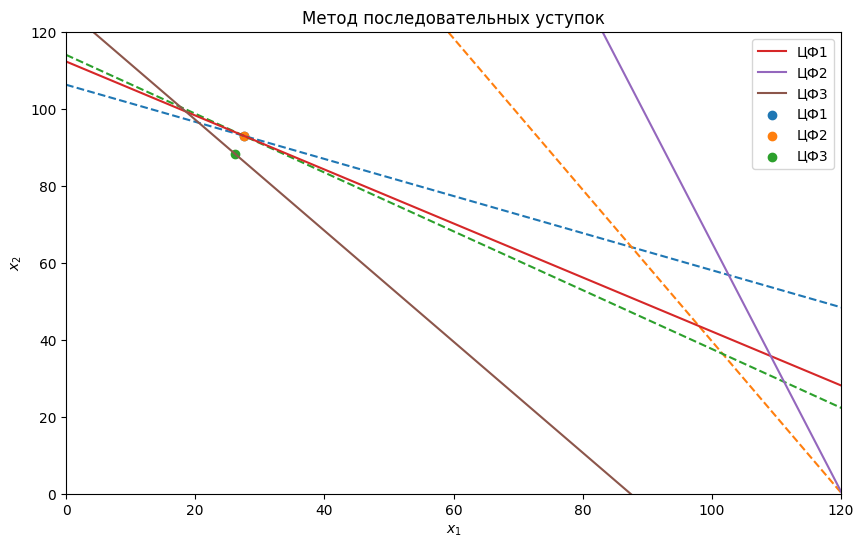

In [6]:
def plot_constraints_2(a, a0):
    x = np.linspace(0, 220, 400)
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.plot(x, (a0[i] - a[i, 0] * x) / a[i, 1], linestyle='dashed')
    plt.xlim(0, 120)
    plt.ylim(0, 120)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Метод последовательных уступок')
    
    plt.plot([0, (c1[0]*res_profit_concession.x[0]+c1[1]*res_profit_concession.x[1]) / c1[0]], [(c1[0]*res_profit_concession.x[0]+c1[1]*res_profit_concession.x[1]) / c1[1], 0], label=f'ЦФ1')
    plt.plot([0, (c2[0]*res_revenue.x[0]+c2[1]*res_revenue.x[1]) / c2[0]], [(c2[0]*res_revenue.x[0]+c2[1]*res_revenue.x[1]) / c2[1], 0], label=f'ЦФ2')
    plt.plot([0, (c3[0]*res_cost_concession.x[0]+c3[1]*res_cost_concession.x[1]) / c3[0]], [(c3[0]*res_cost_concession.x[0]+c3[1]*res_cost_concession.x[1]) / c3[1], 0], label=f'ЦФ3')
    #plt.plot([0, (c_sum[0]*res_sum.x[0]+c_sum[1]*res_sum.x[1]) / c_sum[0]], [(c_sum[0]*res_sum.x[0]+c_sum[1]*res_sum.x[1]) / c_sum[1], 0], label=f'ЦФ123')

    # Выделение области допустимых решений (ОДР) желтым цветом
    y1 = np.maximum(0, (a0[0] - a[0, 0] * x) / a[0, 1])
    y2 = np.maximum(0, (a0[1] - a[1, 0] * x) / a[1, 1])
    y3 = np.maximum(0, (a0[2] - a[2, 0] * x) / a[2, 1])
    
    #t1 = (c3[0]*res_cost_concession.x[0]+c3[1]*res_cost_concession.x[1]) / c3[0]
    #t2 = (c3[0]*res_cost_concession.x[0]+c3[1]*res_cost_concession.x[1]) / c3[1]
    #print(t1, t2)
    #, np.minimum(t2, t1),
    #plt.fill_between(x, np.minimum(np.minimum(y1, y2), y3),
    #                 color='yellow', interpolate=True, alpha=0.3)
    plt.legend()
    
plot_constraints_2(a, a0)
plt.scatter(res_profit_2.x[0], res_profit_2.x[1], label=f'ЦФ1')
plt.scatter(res_profit_concession.x[0], res_profit_concession.x[1], label=f'ЦФ2')
plt.scatter(res_cost_concession.x[0], res_cost_concession.x[1], label=f'ЦФ3')
plt.legend()